# Import libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import graphviz

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


# Load Data

In [2]:
import helper

train_images, train_labels, class_names = helper.load_pickle('dataset/grayscale/training')
test_images, test_labels, test_names = helper.load_pickle('dataset/grayscale/test')

# Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 46371 images in the training set, 
with each image represented as 100 x 100 pixels:

In [3]:
train_images.shape

(46371, 100, 100)

In [18]:
train_images[0].shape

(100, 100)

In [4]:
np.min(train_images[0]), np.max(train_images[0])

(0.018638823529411763, 1.0)

Likewise, there are 46371 labels in the training set:

In [5]:
len(train_labels)

46371

In [6]:
train_labels

array([ 0,  0,  0, ..., 89, 89, 89])

In [7]:
test_images.shape

(15563, 100, 100)

In [8]:
len(test_labels)

15563

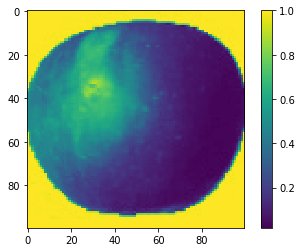

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

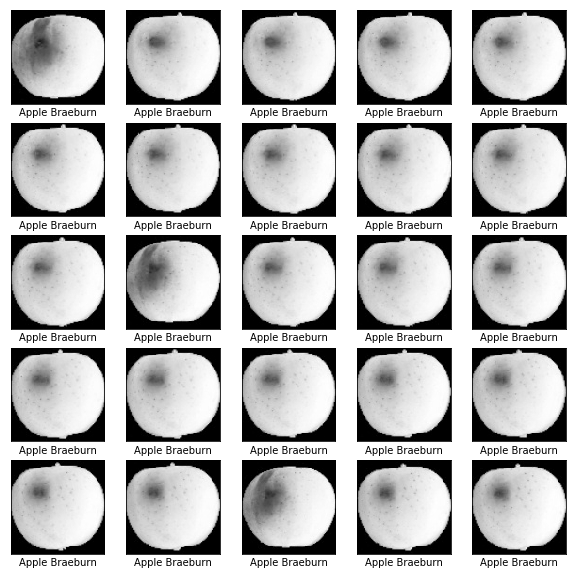

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [11]:
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='./logsweek6-cnn', 
        histogram_freq=0, 
        batch_size=32, 
        write_graph=True, 
        write_grads=False, 
        write_images=False, 
        embeddings_freq=0, 
        embeddings_layer_names=None, 
        embeddings_metadata=None, 
        embeddings_data=None
    )
]

In [30]:
train_images = train_images.reshape(46371,100,100,1)
test_images = test_images.reshape(15563,100,100,1)

# CNN Training

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [19]:
input_shape = (100, 100, 1)
nClasses = 90

In [34]:
def createModel():
    model = Sequential()
    model.add(Conv2D(100, (4, 4), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(100, (4, 4), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [35]:
model1 = createModel()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 100, 100, 100)     1700      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 97, 97, 100)       160100    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 48, 48, 100)       0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 48, 48, 100)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 48, 48, 64)        57664     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 64)        0         
__________

In [36]:
batch_size = 256
epochs = 100
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
history = model1.fit(train_images, train_labels, epochs=100,
                batch_size=256,
                validation_split=0.2,
                shuffle=True,
                callbacks=callbacks)

ValueError: Error when checking target: expected dense_11 to have shape (90,) but got array with shape (1,)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

In [ ]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)